### フルネルの式 0.01°

In [1]:
import numpy as np
ni = 1
nt = 1.4
ai = 0.01/180
at = np.arcsin(np.sin(ai)*ni/nt)
Rfres = ((np.sin(ai-at)/np.sin(ai+at))**2+(np.tan(ai-at)/np.tan(ai+at))**2)/2
Rfres

0.027777777777777755

### Wang の photon weight 初期条件

In [2]:
Rsp = ((ni-nt)/(ni+nt))**2
Rsp

0.027777777777777766

### 透過判別でどれだけ減るか

In [3]:
np.count_nonzero(Rfres>=np.random.rand(int(1e7)))/1e7

0.0276518

### フルネルの式 30°

In [4]:
ai = 30/180
at = np.arcsin(np.sin(ai)*ni/nt)
Rfres = ((np.sin(ai-at)/np.sin(ai+at))**2+(np.tan(ai-at)/np.tan(ai+at))**2)/2
Rfres

0.02778833340245436

# コードのチェック

In [1]:
from pymopt.voxel import VoxelPlateModel

from scipy import stats
import numpy as np
import pandas as pa
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def radialDistance(p,w,nn,dr,nPh):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn,nPh):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

In [3]:
nPh = 500000
params = {
    'thickness':[10],
    'ms':[90],
    'ma':[10],
    'g':[0.],
    'n':[1.5],
    'n_air':1.,
    'xy_size':[10,10],
    'voxel_space':0.1,
}

model = VoxelPlateModel(
    nPh = nPh,
    beam_angle = 30/180,
    initial_refrect_by_angle = False
)

model.build(**params)
start = time.time()
model = model.start()
print('%s sec'%(time.time()-start))

rez = model.get_result()
p_result = rez["p"]
v_result = rez["v"]
w_result = rez["w"]

Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Memory area size for voxel storage: 1.061 Mbyte

###### Start ######

Progress: 5.421 [％]
Calculation time: 0 minutes 0.624 seconds.

Progress: 13.595 [％]
Calculation time: 0 minutes 1.274 seconds.

Progress: 24.5 [％]
Calculation time: 0 minutes 2.370 seconds.

Progress: 37.217 [％]
Calculation time: 0 minutes 4.190 seconds.

Progress: 50.309 [％]
Calculation time: 0 minutes 6.973 seconds.

Progress: 62.324 [％]
Calculation time: 0 minutes 11.401 seconds.

Progress: 99.727 [％]
Calculation time: 0 minutes 14.178 seconds.


###### Finish ######
Maximum step number: 219
######
Mean Rd 0.220924
Mean Tt 0.000000

Calculation time: 0 minutes 14.381 seconds.
14.396759748458862 sec


In [4]:
nPh = 500000
params = {
    'thickness':[10],
    'ms':[90],
    'ma':[10],
    'g':[0.],
    'n':[1.5],
    'n_air':1.,
    'xy_size':[10,10],
    'voxel_space':0.1,
}

model = VoxelPlateModel(
    nPh = nPh,
    beam_angle = 30/180,
    initial_refrect_by_angle = True
)

model.build(**params)
start = time.time()
model = model.start()
print('%s sec'%(time.time()-start))

rez2 = model.get_result()
p_result2 = rez2["p"]
v_result2 = rez2["v"]
w_result2 = rez2["w"]

Tt_index2 = np.where(v_result2[2]>0)[0]
Rd_index2 = np.where(v_result2[2]<0)[0]

Memory area size for voxel storage: 1.061 Mbyte

###### Start ######

Progress: 9.229 [％]
Calculation time: 0 minutes 0.567 seconds.

Progress: 17.034 [％]
Calculation time: 0 minutes 1.130 seconds.

Progress: 27.498 [％]
Calculation time: 0 minutes 2.098 seconds.

Progress: 39.604 [％]
Calculation time: 0 minutes 3.961 seconds.

Progress: 52.235 [％]
Calculation time: 0 minutes 6.772 seconds.

Progress: 63.738 [％]
Calculation time: 0 minutes 10.667 seconds.

Progress: 99.739 [％]
Calculation time: 0 minutes 13.625 seconds.


###### Finish ######
Maximum step number: 197
######
Mean Rd 0.260629
Mean Tt 0.000000

Calculation time: 0 minutes 13.739 seconds.
13.789403200149536 sec


In [5]:
nPh = 500000
params = {
    'thickness':[10],
    'ms':[90],
    'ma':[10],
    'g':[0.],
    'n':[1.5],
    'n_air':1.,
    'xy_size':[10,10],
    'voxel_space':0.1,
}

model = VoxelPlateModel(
    nPh = nPh,
    beam_angle = 0/180,
    initial_refrect_by_angle = False
)

model.build(**params)
start = time.time()
model = model.start()
print('%s sec'%(time.time()-start))

rez3 = model.get_result()
p_result3 = rez3["p"]
v_result3 = rez3["v"]
w_result3 = rez3["w"]

Tt_index3 = np.where(v_result3[2]>0)[0]
Rd_index3 = np.where(v_result3[2]<0)[0]

Memory area size for voxel storage: 1.061 Mbyte

###### Start ######

Progress: 5.359 [％]
Calculation time: 0 minutes 0.615 seconds.

Progress: 13.509 [％]
Calculation time: 0 minutes 1.273 seconds.

Progress: 24.346 [％]
Calculation time: 0 minutes 2.394 seconds.

Progress: 37.153 [％]
Calculation time: 0 minutes 4.246 seconds.

Progress: 50.085 [％]
Calculation time: 0 minutes 7.144 seconds.

Progress: 62.18 [％]
Calculation time: 0 minutes 11.704 seconds.

Progress: 99.73 [％]
Calculation time: 0 minutes 14.920 seconds.


###### Finish ######
Maximum step number: 175
######
Mean Rd 0.219889
Mean Tt 0.000000

Calculation time: 0 minutes 15.058 seconds.
15.077224016189575 sec


Refrected


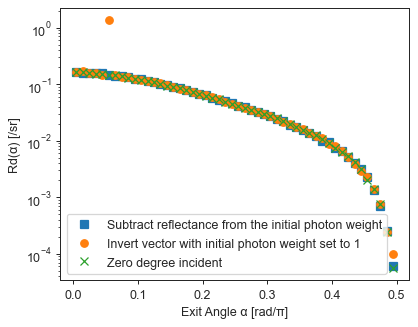

In [6]:
print('Refrected')
nn = 50
alpha,Rda = AngularyResolved(v_result[:,Rd_index],w_result[Rd_index],nn,nPh)
alpha,Rda2 = AngularyResolved(v_result2[:,Rd_index2],w_result2[Rd_index2],nn,nPh)
alpha,Rda3 = AngularyResolved(v_result3[:,Rd_index3],w_result3[Rd_index3],nn,nPh)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Rda,'s',label = 'Subtract reflectance from the initial photon weight')
plt.plot(alpha/np.pi,Rda2,'o',label = 'Invert vector with initial photon weight set to 1')
plt.plot(alpha/np.pi,Rda3,'x',label = 'Zero degree incident')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Rd(α) [/sr]')
plt.legend()
plt.yscale('log')
#plt.xlim(0,0.5)
#plt.ylim(0,0.025)
plt.show()

In [9]:
np.arctan(10/93.41)

0.10664873190514193

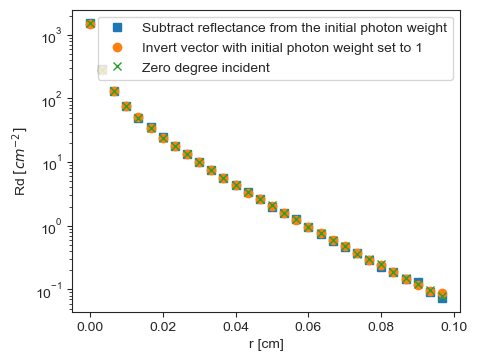

In [7]:
nn = 30
dr = 0.1/nn

alphaRd,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr,nPh = nPh)
alphaRd,Rd2 = radialDistance(p_result2[:,Rd_index2],w_result2[Rd_index2],nn,dr,nPh = nPh)
alphaRd,Rd3 = radialDistance(p_result3[:,Rd_index3],w_result3[Rd_index3],nn,dr,nPh = nPh)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaRd,Rd,'s',label = 'Subtract reflectance from the initial photon weight')
plt.plot(alphaRd,Rd2,'o',label = 'Invert vector with initial photon weight set to 1')
plt.plot(alphaRd,Rd3,'x',label = 'Zero degree incident')
plt.yscale('log')
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.legend()
plt.show()


# 光学系のテスト

In [2]:
from pymopt.voxel import VoxelPlateModel

from scipy import stats
import numpy as np
import pandas as pa
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

lamda = 850
intra_p = 0.2
ms = 0.016*(lamda*1e-3)**-2.4*1e3*intra_p

nPh = 5e6
params = {
    'thickness':[200],
    'ms':[ms],
    'ma':[0.0042232],
    'g':[0.607],
    'n':[1.3276],
    'n_air':1.,
    'xy_size':[200,200],
    'voxel_space':1,
}

model = VoxelPlateModel(
    nPh = nPh,
    beam_angle = 'lens_f',
    wavelength = lamda,
    beam_posision = 10,
    lens_curvature_radius = 51.68,
    grass_type = 'N-BK7',
    initial_refrect_by_angle = True,
)

model.build(**params)
start = time.time()
model = model.start()
print('%s sec'%(time.time()-start))

rez3 = model.get_result()
p_result3 = rez3["p"]
v_result3 = rez3["v"]
w_result3 = rez3["w"]

Tt_index3 = np.where(v_result3[2]>0)[0]
Rd_index3 = np.where(v_result3[2]<0)[0]

Memory area size for voxel storage: 8.242 Mbyte

###### Start ######

Progress: 3.189 [％]
Calculation time: 0 minutes 5.208 seconds.

Progress: 6.835 [％]
Calculation time: 0 minutes 11.295 seconds.

Progress: 15.054 [％]
Calculation time: 0 minutes 24.101 seconds.



KeyboardInterrupt: 

In [ ]:
save_path = '../result/210625_anglyint_850nm_nPh5e6_intra'
model.save_result(save_path,coment='test')

In [ ]:
model.beam_angle

In [ ]:
from pymopt.optics import SideOBD

sobd = SideOBD()
sobd.set_monte_data(model.get_result())
#obd.load_file(save_path)
opt_params ={
    'start':-2.04,'end':62.96,'split':0.25,'wavelength':800,
    'outerD_1':50,'efl_1':100,'bfl_1':93.41,
    'ct_1':10,'et_1':3.553,'r_1':51.68,
    'substrate_1':'N-BK7',
    'outerD_2' : 50,'efl_2' : 50,'bfl_2' : 43.28,
    'ct_2':12,'et_2':3.01,'r_2':39.24,
    'substrate_2':'N-SF11',
    'slit_outerD':50,'slit_D':20,'slit_width':2,'slit_thickness':5,
    'd_pd':3,
    #'distance_2slits':37,'pd_poit_correction':0,
}
sobd.set_params(opt_params)
sobd.start()
res = sobd.get_result()

In [ ]:
plt.plot(res.Z,res["log(int)"])
plt.show()

In [ ]:
plt.plot(res.Z,res["int"])
plt.show()